# Homework 5 (100 points)

This homework will focus on Neural Networks and visualization.

a) Write a function that takes a keras network and outputs an image (png format) of the network. (10points)

You can assume the model is sequential and only uses dense layers. The input and output neurons must be blue circles. The hidden neurons must be green circles. The edges must be directed red arrows.

For example, the output image for

```python
    model = keras.models.Sequential()
    model.add(layers.Dense(2, input_dim=2))
    model.add(layers.Dense(1))
    model.compile(loss="binary_crossentropy")
```

should look exactly like this:

In [12]:
from IPython.display import Image
#Image(filename="example.png")

Hint: use the networkx library (specifically the [to_agraph](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.to_agraph.html) method)

In [13]:
#libraries used in this exercise
import numpy as np
import networkx as nx
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

from tensorflow.keras import layers, models, activations
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from networkx.drawing.nx_agraph import to_agraph

from IPython.display import Image as img_display

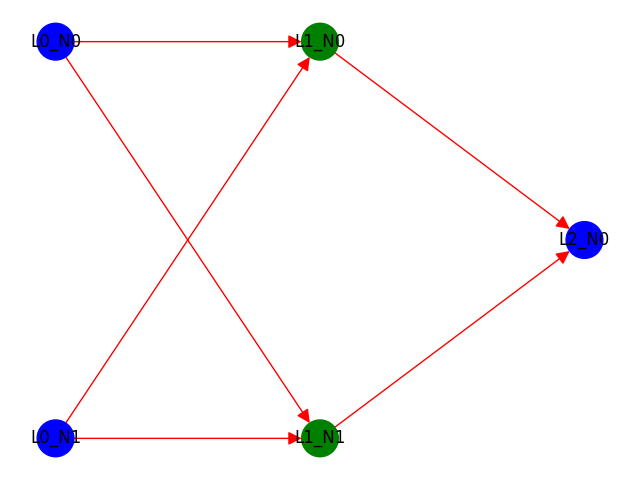

In [14]:
def plot_keras_model(model, filename):
    # initialize graph
    G = nx.DiGraph()

    # model layers info
    layers_info = []
    for i, layer in enumerate(model.layers):
        if isinstance(layer, layers.Dense):
            if i == 0:
                # input nodes
                input_shape = layer.input_shape
                if input_shape and len(input_shape) > 1:
                    layers_info.append((input_shape[-1], 'input'))
            # the output layer if final, else hidden
            layers_info.append((layer.units, 'output' if i == len(model.layers)-1 else 'hidden'))

    # format nodes with type
    for i, (layer_size, layer_type) in enumerate(layers_info):
        nodes = [('L{}_N{}'.format(i, j), {'layer': i, 'type': layer_type}) for j in range(layer_size)]
        G.add_nodes_from(nodes)

    # add edges to graph
    for i in range(len(layers_info) - 1):
        for j in range(layers_info[i][0]):
            for k in range(layers_info[i+1][0]):
                G.add_edge(f'L{i}_N{j}', f'L{i+1}_N{k}')

    # color coding
    color_map = ['blue' if node_data['type'] in ['input', 'output'] else 'green'
                 for _, node_data in G.nodes(data=True)]

    # make graph
    pos = nx.multipartite_layout(G, subset_key="layer")
    nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=700, arrows=True,
            arrowstyle='-|>', arrowsize=20, edge_color='red')

    # Save the figure
    plt.savefig(filename, format='PNG')
    plt.close()  # Close the figure to prevent display in the notebook


    return filename

model_a = models.Sequential()
model_a.add(layers.Dense(2, input_dim=2))
model_a.add(layers.Dense(1))
model_a.compile(loss="binary_crossentropy")

plot_keras_model(model_a, "model_a.png")
Image.open("model_a.png")

b) Generate 100 datapoints of the form y = 5x - 1 + e where e ~ N(0, 1) and plot the data in a scatter plot. Create a Neural Network with no hidden layers (just input to ouput each with just one neuron), using the `mean_squared_error` loss and no activation function. Create an image of this model using a) then train this model on the dataset produced such that it learns a good fit to the points. Plot that fitted line. (10points)

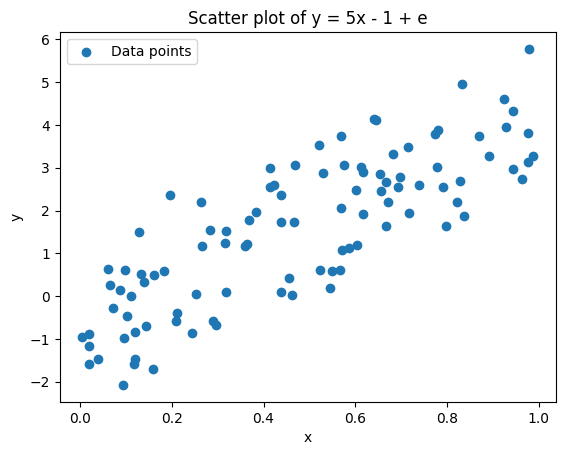

Epoch 1/200
4/4 [==============================] - 0s 5ms/step - loss: 5.8955
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 5.3510
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 4.8597
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 4.4974
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 4.1404
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 3.8473
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 3.6069
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 3.4333
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 3.2595
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 3.1014
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 2.9794
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 2.8603
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

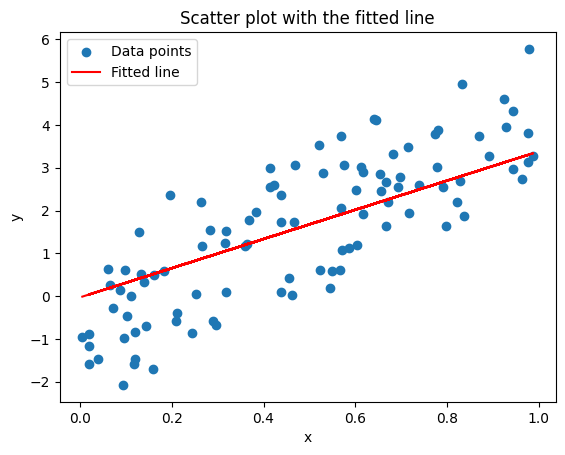

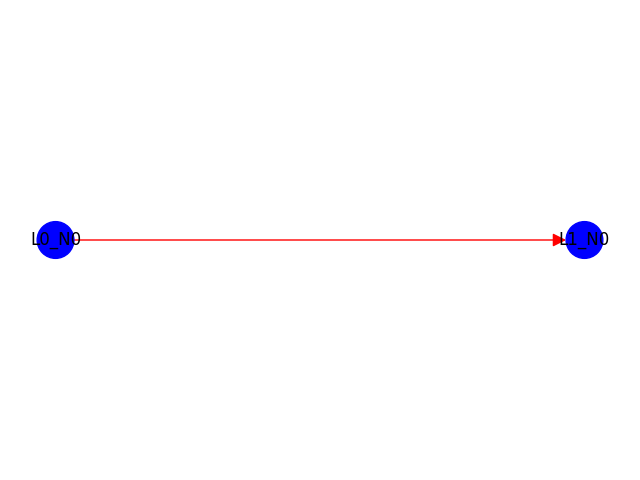

In [15]:
# y = 5x - 1 + e where e ~ N(0, 1)
np.random.seed(0)
x = np.random.rand(100, 1)
e = np.random.randn(100, 1)
y = 5 * x - 1 + e

# scatter plot
plt.scatter(x, y, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y = 5x - 1 + e')
plt.legend()
plt.show()


# Neural Network
model = Sequential([
    Dense(units=1, input_shape=(1,), use_bias=True)
])

# mean_squared_error loss and no activation function
model.compile(optimizer='sgd', loss='mean_squared_error')

# train
model.fit(x, y, epochs=200)

# predict
y_pred = model.predict(x)

# plot fitted line
plt.scatter(x, y, label='Data points')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot with the fitted line')
plt.legend()
plt.show()

#image of model using (a)
plot_keras_model(model, "model_b.png")
Image.open("model_b.png")

c)  (15 points)Create a 3D animation (.gif) of the (weight, bias, loss) point over the training period.

d) Generate data of the form y = 5x^3 + 3x^2 + x - 1 + e where e ~ N(0, 1) and plot the data in a scatter plot. Create and train a neural network on this dataset and plot the resulting curve through the scatter plot. Explain your choice of model architecture (number of layers, and neurons) as well as your choice of activation function. (5points)

I used one input and one output layer as there is one input (x) and one output (y). I used activation function 'relu' since it is a non linear function that can output larger than 1. I used a single hidden layer with 10 neurons to be able to predict non linearity as a single neuron could not.


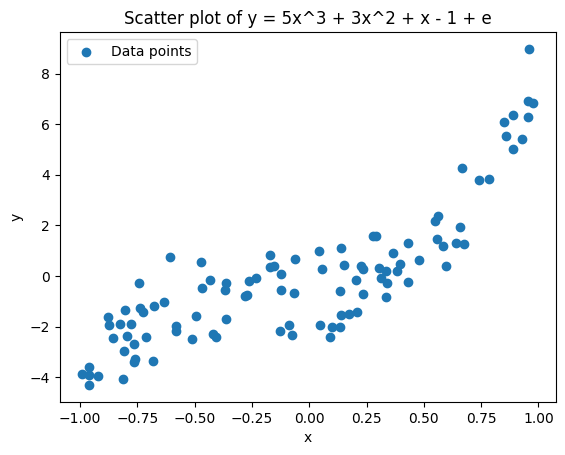

Epoch 1/200
4/4 [==============================] - 0s 5ms/step - loss: 8.1180
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 7.5792
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 7.2204
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 6.8571
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 6.4758
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 6.1366
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 5.9140
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 5.6925
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 5.4456
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 5.2755
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 5.0972
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 4.9142
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

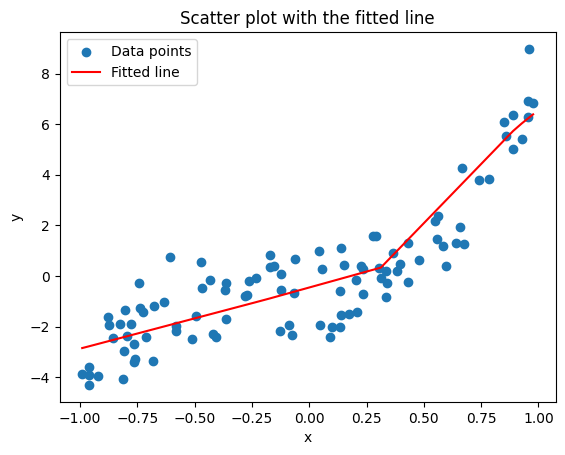

In [16]:
# y = 5x^3 + 3x^2 + x - 1 + e where e ~ N(0, 1)
np.random.seed(0)
x = np.random.rand(100, 1) * 2 - 1
e = np.random.randn(100, 1)
y = 5 * x**3 + 3 * x**2 + x - 1 + e

# scatter plot
plt.scatter(x, y, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y = 5x^3 + 3x^2 + x - 1 + e')
plt.legend()
plt.show()


# Neural Network
model = Sequential()
model.add(Dense(units=10, input_shape=(1,), activation='relu')) #relu cause non-linear
model.add(Dense(units=1))

# mean_squared_error loss and no activation function
model.compile(optimizer='sgd', loss='mean_squared_error')

# train
model.fit(x, y, epochs=200)


# predict
y_pred = model.predict(x)

sorted_indices = np.argsort(x[:, 0])
sorted_x = x[sorted_indices]
sorted_y_pred = y_pred[sorted_indices]


# plot fitted line
plt.scatter(x, y, label='Data points')
plt.plot(sorted_x, sorted_y_pred, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot with the fitted line')
plt.legend()
plt.show()

e) Create an animation of the resulting curve learned by your model throughout the training process. (15points)

4/4 [==============================] - 0s 3ms/step


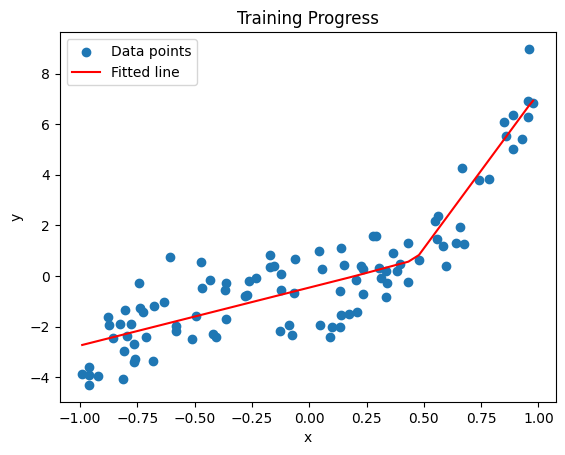

In [17]:
from tensorflow.keras.callbacks import LambdaCallback

predictions_per_epoch = []

def on_epoch_end(epoch, logs):
    sorted_indices = np.argsort(x[:, 0])
    sorted_x = x[sorted_indices]

    # predict results
    y_pred = model.predict(sorted_x)
    predictions_per_epoch.append(y_pred)

epoch_callback = LambdaCallback(on_epoch_end=on_epoch_end)

# train
model.fit(x, y, epochs=200, callbacks=[epoch_callback], verbose=0)

# animation
fig, ax = plt.subplots()
ax.scatter(x, y, label='Data points')
line, = ax.plot([], [], color='red', label='Fitted line')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Training Progress')
ax.legend()

# initialization function
def init():
    line.set_data([], [])
    return line,

# update function
def update(frame):
    sorted_indices = np.argsort(x[:, 0])
    sorted_x = x[sorted_indices]
    y_pred = predictions_per_epoch[frame]
    line.set_data(sorted_x, y_pred)
    return line,

# animation
ani = FuncAnimation(fig, update, frames=len(predictions_per_epoch),
                    init_func=init, blit=True)
ani.save('model_training_animation.gif', writer='imagemagick', fps=15)

# plot
plt.show()
# show with html
HTML(ani.to_html5_video())

f) Below is code to create a Generative Adversarial Network (GAN). The goal of the GAN is to generate data that is fake but looks real. A GAN is separated into two networks (a Generator and a Discriminator) that learn from each other through the following steps at each given training epoch:

1. The Generator generates data
2. The Discriminator is trained to learn how to distinguish real data from the fake data that the generator just generated.
3. The Generator is then trained to improve its ability to generate fake data by being informed by the Discriminators new ability to distinguish real from fake.

Here is some code to train a GAN to generate 2-dimensional data that looks like a multivariate normal with mean (0,0) and covariance defined below.

The code has one major flaw though that will prevent it from ever generating data that looks like the real data. Something is wrong with the architecture of the model (layers, activation etc). Find and fix that flaw and explain your reasoning below. (15points)

Since the mean should be (0, 0), this implies that the data can be negative or positive. The major flaw is that the activation function 'sigmoid' is used, which can only produce output between 0 and 1 as it is used for probability. Instead, negative outputs should be allowed by using elu, which can output negatives and values greater than 1.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from PIL import Image as im

TEMPFILE = 'temp.png'

# Define the parameters
np.random.seed(0)
gen_input_dim = 100
epochs = 100
batch_size = 128
images = []

# Define the generator model
generator = Sequential()
generator.add(Dense(32, input_dim=gen_input_dim, activation='tanh'))

### MAJOR FLAW FIX###
generator.add(Dense(2, activation='elu'))

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Dense(16, input_dim=2))
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the models
generator.compile(loss='mse')
discriminator.compile(loss='binary_crossentropy')

# Define the GAN model
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy')

# Define the real data
x_real = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 1000)

# Train the GAN
# don't change the code below
for epoch in range(epochs):
    # Generate fake data
    z = np.random.normal(size=(batch_size, gen_input_dim))
    x_fake = generator.predict(z)

    # Train the discriminator
    discriminator.trainable = True
    discriminator.train_on_batch(x_real, np.ones((len(x_real), 1)))
    discriminator.train_on_batch(x_fake, np.zeros((batch_size, 1)))

    # Train the generator
    discriminator.trainable = False
    gan.train_on_batch(z, np.ones((batch_size, 1)))
print(x_real)
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
print(x_fake)

4/4 [==============================] - 0s 3ms/step
[[-1.72779275 -1.32763554]
 [-1.96805856  0.27283464]
 [-1.12871372 -2.1059916 ]
 ...
 [-0.22019962 -0.12244882]
 [-1.29297181 -1.13453796]
 [ 1.64440082  0.33343045]]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXX
[[ 0.40095857 -0.5951562 ]
 [ 0.36588073  0.62420595]
 [-0.83166564 -0.11860833]
 [ 0.49415237 -0.21220726]
 [ 0.99143857 -0.01703348]
 [ 1.2496055  -0.16377456]
 [-0.15794812 -0.7282462 ]
 [ 0.38093987  0.64454097]
 [ 0.15894641 -0.2805776 ]
 [ 1.4512906  -0.38220158]
 [-0.7395365   0.25769272]
 [-0.619932   -0.46563238]
 [ 1.1190181   0.09061004]
 [-0.13478813 -0.7913577 ]
 [ 0.7149507   1.8430364 ]
 [-0.54339063  0.1776873 ]
 [-0.39484912  0.18618028]
 [-0.5003447   1.5721554 ]
 [ 1.084795   -0.22125463]
 [-0.64562047  0.20409267]
 [-0.37743068 -0.0813012 ]
 [-0.50767905  0.44804353]
 [ 0.7259755   0.4196157 ]
 [ 0.9804109   0.41786602]
 [ 1.1875378   0.13427469]
 [ 0.28496563 -0.25457484]
 [ 0.16474183 -0.04365679]
 [-0.6022046   0.67525

g) Create an animation of the generated data over the course of the training process (with the real data plotted in a different color for reference). (15points)

4/4 [==============================] - 0s 4ms/step


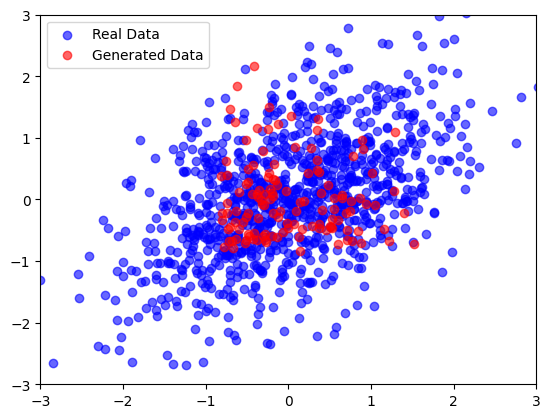

In [26]:
generated_data = []

# loop for each epoch
for epoch in range(epochs):
    z = np.random.normal(size=(batch_size, gen_input_dim))
    x_fake = generator.predict(z)
    generated_data.append(x_fake)

    discriminator.trainable = True
    discriminator.train_on_batch(x_real, np.ones((len(x_real), 1)))
    discriminator.train_on_batch(x_fake, np.zeros((batch_size, 1)))

    discriminator.trainable = False
    gan.train_on_batch(z, np.ones((batch_size, 1)))

# animation
fig, ax = plt.subplots()
real_data_scatter = ax.scatter(x_real[:, 0], x_real[:, 1], color='blue', alpha=0.6, label='Real Data')
fake_data_scatter = ax.scatter([], [], color='red', alpha=0.6, label='Generated Data')
ax.legend()
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

# update function
def update(epoch):
    fake_data = generated_data[epoch]
    fake_data_scatter.set_offsets(fake_data)
    return fake_data_scatter,

# animation
ani = FuncAnimation(fig, update, frames=epochs, interval=100, blit=True)

ani.save('gan_training_animation.gif', writer='imagemagick')

# plot
plt.show()
# show using html
HTML(ani.to_html5_video())


h) Tune the above model in order to generate data as close as possible to the real data. (15points)

In [1]:
TEMPFILE = 'temp.png'

# Define the parameters
np.random.seed(0)
gen_input_dim = 100
epochs = 100
batch_size = 128
images = []

# Define the generator model
generator = Sequential()
generator.add(Dense(32, input_dim=gen_input_dim, activation='tanh'))

### MAJOR FLAW FIX###
generator.add(Dense(2, activation='elu'))

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Dense(16, input_dim=2))
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the models
generator.compile(loss='mse')
discriminator.compile(loss='binary_crossentropy')

# Define the GAN model
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy')

# Define the real data
x_real = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 1000)

# Train the GAN
# don't change the code below
for epoch in range(epochs):
    # Generate fake data
    z = np.random.normal(size=(batch_size, gen_input_dim))
    x_fake = generator.predict(z)

    # Train the discriminator
    discriminator.trainable = True
    discriminator.train_on_batch(x_real, np.ones((len(x_real), 1)))
    discriminator.train_on_batch(x_fake, np.zeros((batch_size, 1)))

    # Train the generator
    discriminator.trainable = False
    gan.train_on_batch(z, np.ones((batch_size, 1)))



NameError: name 'np' is not defined